# Moving Average (MA) Model

[Mastering Time-Series Analysis & Forecasting - Episode 9](https://youtu.be/SOp2yX6DiDA)
</br></br>
By <span style="color: purple;font-weight:bold">Tiger4Code</span>:
www.<span style="color: blue;">Youtube.com/</span><span style="color: red;">@Tiger4Code</span>


# Moving Average Model (MA)

Python script to determine the q-value for an MA model using Autocorrelation Function (ACF). It generates a synthetic time series representing the monthly simple return of an asset, visualizes the ACF, determines the best q value, and fits the MA model to predict future values.

Import Libraries

In [14]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error


### Step 1: Generate Synthetic Time Series for Monthly Returns



In [56]:
# Step 1: Generate synthetic monthly returns
np.random.seed(42)  # For reproducibility
months = pd.date_range(start="1980-01-01", end="2008-12-01", freq="M")
returns = np.random.normal(loc=0.01, scale=0.05, size=len(months))  # Mean=1%, Std Dev=5%

# Create the time series
time_series = pd.Series(data=returns, index=months, name="Monthly Returns")


### Step 2: Visualize the Time Series

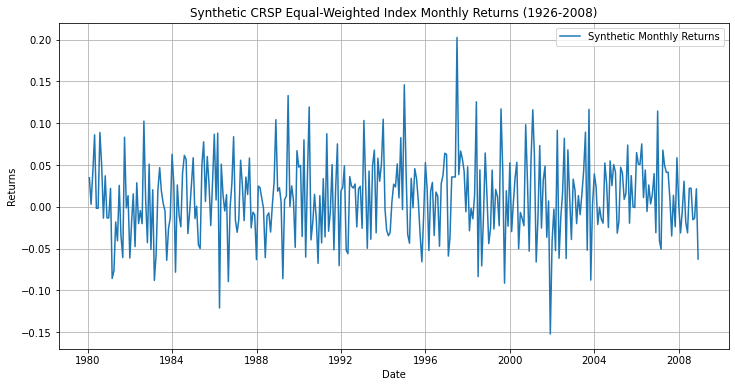

In [57]:

# Plot the synthetic time series
plt.figure(figsize=(12, 6))
plt.plot(time_series, label="Synthetic Monthly Returns")
plt.title("Synthetic CRSP Equal-Weighted Index Monthly Returns (1926-2008)")
plt.xlabel("Date")
plt.ylabel("Returns")
plt.legend()
plt.grid()
plt.show()

### Step 3: Compute and Plot the ACF

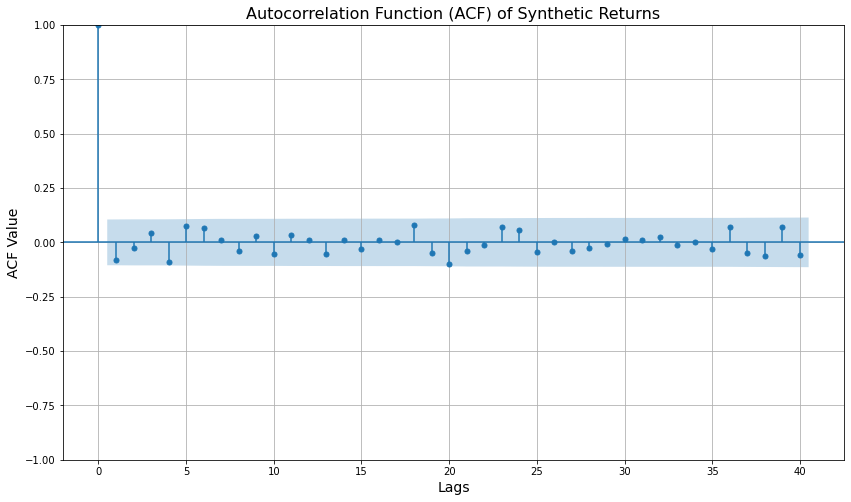

In [58]:

# Step 2: Plot ACF to determine the order of the MA model
fig = plt.figure(figsize=(14, 8))  # Create a larger figure explicitly
plot_acf(time_series, lags=40, alpha=0.05, ax=fig.add_subplot(111))  # Pass the figure's subplot
plt.title("Autocorrelation Function (ACF) of Synthetic Returns", fontsize=16)
plt.xlabel("Lags", fontsize=14)
plt.ylabel("ACF Value", fontsize=14)
plt.grid()
plt.show()


### Step 4: Determine the Best Order (q) for MA Model

The best q is the lag where PACF cuts off (lags beyond are statistically insignificant).
Visual inspection will help decide the order.

- Notice that the last lag that is statistically significant and above the confidence level is lag 20, suggesting a value of q=20 for the MA model.



### Step 5: Fit the AR Model

In [65]:
# Based on ACF, select the order of the MA model
q = 20  # Adjust based on the ACF plot

# Step 3: Split the dataset into training and testing
train_end = "2007-12-01"
train_data = time_series[:train_end]
test_data = time_series[train_end:]

# Fit an MA(q) model
ma_model = ARIMA(train_data, order=(0, 0, q)).fit()


/Users/lighttiger/opt/anaconda3/envs/py38-ml/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


### Step 6: Predict Future Values

In [66]:

# Forecast future values
n_forecast = len(test_data)
forecast = ma_model.forecast(steps=n_forecast)


In [67]:
forecast

2007-12-31    0.007027
2008-01-31   -0.008373
2008-02-29    0.024756
2008-03-31    0.000456
2008-04-30    0.016701
2008-05-31    0.009861
2008-06-30    0.015334
2008-07-31    0.004351
2008-08-31   -0.003165
2008-09-30    0.020457
2008-10-31    0.022518
2008-11-30    0.006411
Freq: M, Name: predicted_mean, dtype: float64

### Step 7: Visualize Forecasted Values

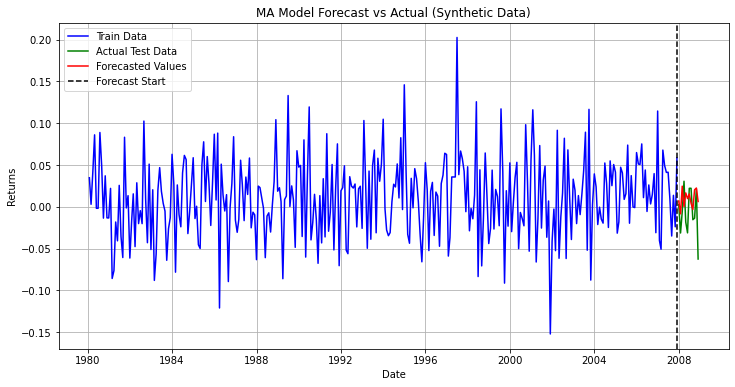

In [68]:

# Step 4: Show prediction and actual series on the same plot
plt.figure(figsize=(12, 6))
plt.plot(train_data, label="Train Data", color="blue")
plt.plot(test_data, label="Actual Test Data", color="green")
plt.plot(forecast, label="Forecasted Values", color="red")
plt.axvline(x=train_data.index[-1], color="black", linestyle="--", label="Forecast Start")
plt.title("MA Model Forecast vs Actual (Synthetic Data)")
plt.xlabel("Date")
plt.ylabel("Returns")
plt.legend()
plt.grid()
plt.show()



### Optional: Evaluate Model Performance (In-Sample)

In [69]:
# Step 5: Calculate MSE
mse = mean_squared_error(test_data, forecast)
print(f"Mean Squared Error (MSE) of Forecast: {mse:.6f}")


Mean Squared Error (MSE) of Forecast: 0.000976


### Plot Actual vs Predicted Values

/Users/lighttiger/opt/anaconda3/envs/py38-ml/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


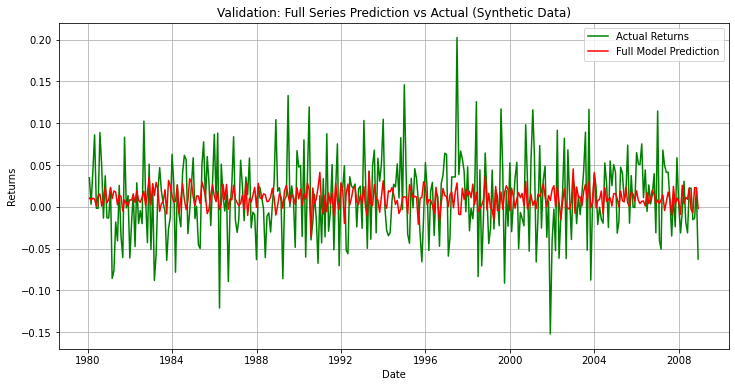

In [70]:

# Step 6: Validate by predicting values for the full series
full_model = ARIMA(time_series, order=(0, 0, q)).fit()
full_forecast = full_model.predict()

# Plot the full prediction vs actual series
plt.figure(figsize=(12, 6))
plt.plot(time_series, label="Actual Returns", color="green")
plt.plot(full_forecast, label="Full Model Prediction", color="red")
plt.title("Validation: Full Series Prediction vs Actual (Synthetic Data)")
plt.xlabel("Date")
plt.ylabel("Returns")
plt.legend()
plt.grid()
plt.show()
